In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

plt.style.use('fivethirtyeight')

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "data/AMZN.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "praxitelisk/financial-time-series-datasets",
  file_path,
)

print("First 5 records:", df.head())

C:\Users\marci\AppData\Local\Temp\ipykernel_7500\240195017.py:6: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:         Date  Adj Close
0  5/15/1997   1.958333
1  5/16/1997   1.729167
2  5/19/1997   1.708333
3  5/20/1997   1.635417
4  5/21/1997   1.427083


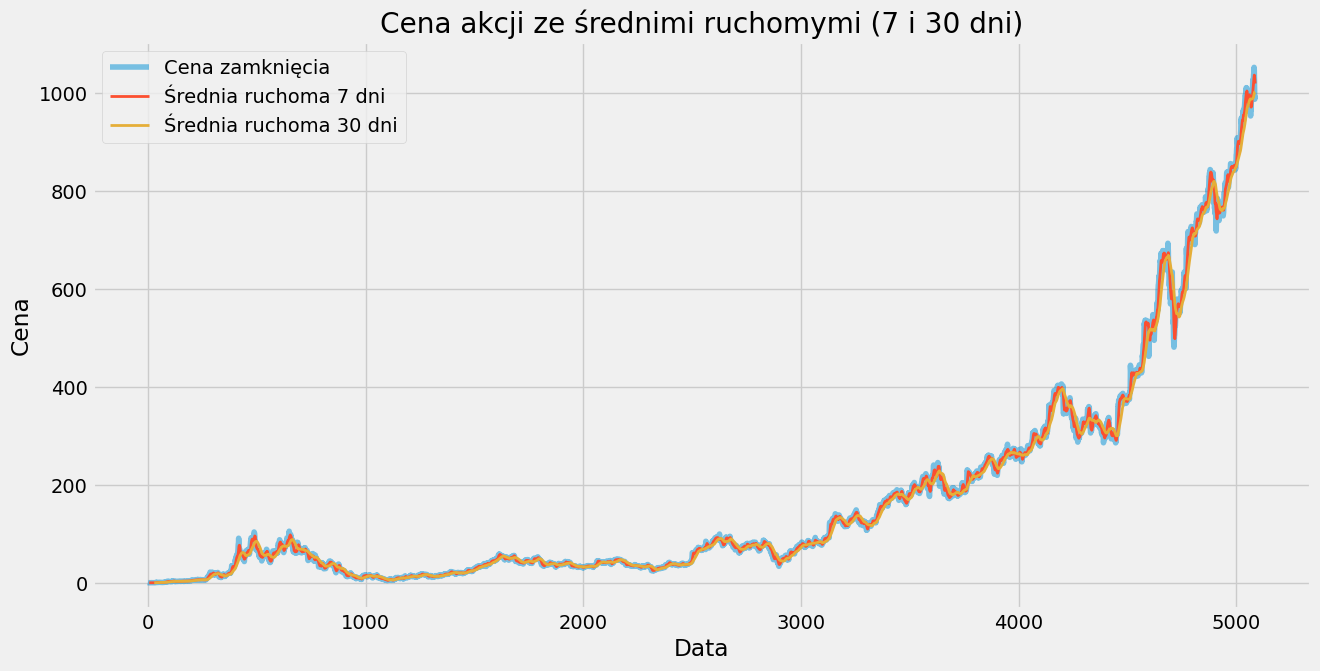

In [3]:
# Obliczanie SMA (Simple Moving Average) dla kolumny 'Close' (cena zamknięcia)
df['SMA_7'] = df['Adj Close'].rolling(window=7).mean()
df['SMA_30'] = df['Adj Close'].rolling(window=30).mean()

# Wizualizacja ceny i średnich
plt.figure(figsize=(14, 7))
plt.plot(df['Adj Close'], label='Cena zamknięcia', alpha=0.5)
plt.plot(df['SMA_7'], label='Średnia ruchoma 7 dni', linewidth=2)
plt.plot(df['SMA_30'], label='Średnia ruchoma 30 dni', linewidth=2)
plt.title('Cena akcji ze średnimi ruchomymi (7 i 30 dni)')
plt.xlabel('Data')
plt.ylabel('Cena')
plt.legend()
plt.show()

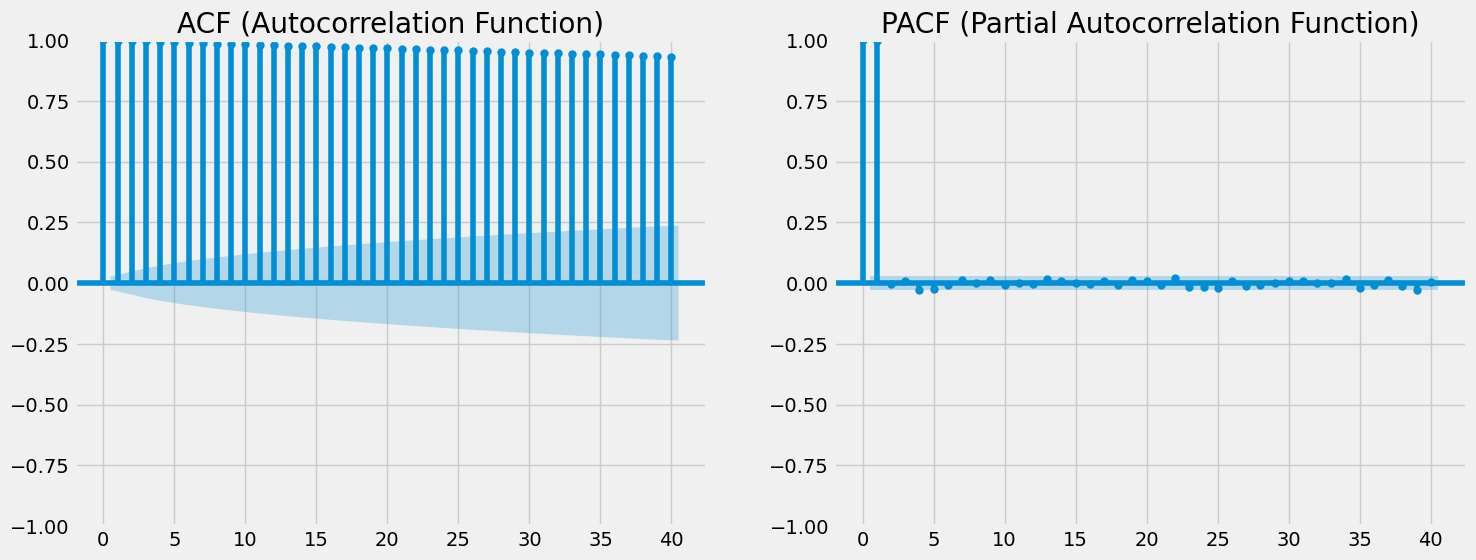

In [4]:
# Wykresy ACF i PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Autokorelacja (ACF)
plot_acf(df['Adj Close'].dropna(), ax=ax1, lags=40)
ax1.set_title('ACF (Autocorrelation Function)')

# Częściowa autokorelacja (PACF)
plot_pacf(df['Adj Close'].dropna(), ax=ax2, lags=40)
ax2.set_title('PACF (Partial Autocorrelation Function)')

plt.show()

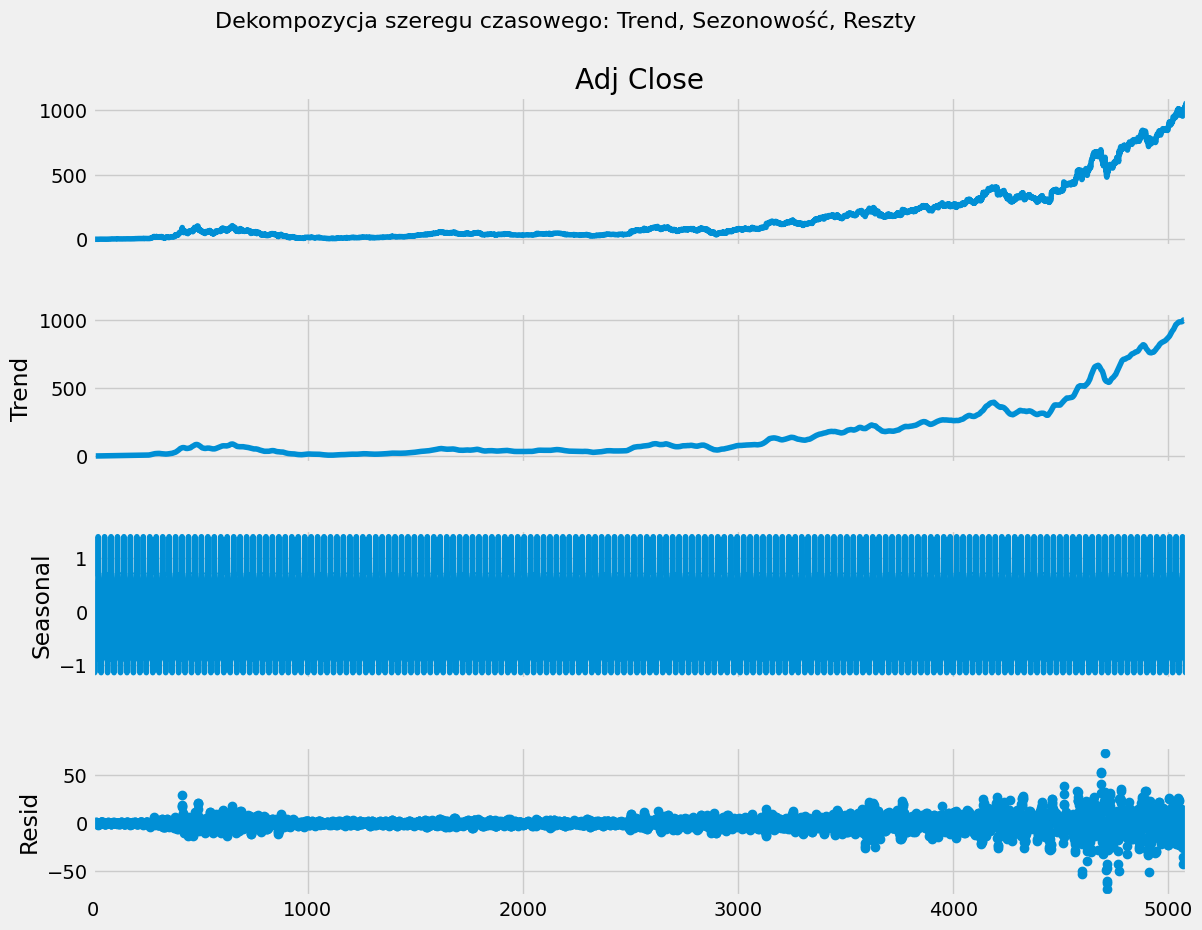

In [5]:
result = seasonal_decompose(df['Adj Close'], model='additive', period=30)

fig = result.plot()
fig.set_size_inches(14, 10)
plt.suptitle('Dekompozycja szeregu czasowego: Trend, Sezonowość, Reszty', fontsize=16)
plt.show()